In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
clustered_books = pd.read_csv('../IR Project/clustered_books.csv')
clustered_books.drop(['Unnamed: 0'], inplace=True, axis=1)
clustered_books.head(5)

,isbn,summary,cluster_label
0,0195153448,Provides an introduction to classical myths pl...,0
1,0002005018,"In a small town in Canada, Clara Callan reluct...",6
2,0060973129,"Here, for the first time in paperback, is an o...",13
3,0374157065,"Describes the great flu epidemic of 1918, an o...",16
4,0393045218,A look at the incredibly well-preserved ancien...,0


In [3]:
clustered_books.describe()

,cluster_label
count,134692.000000
mean,10.369628
std,9.474243
min,0.000000
25%,0.000000
50%,7.000000
75%,20.000000
max,29.000000


In [4]:
clustered_books.tail(5)

,isbn,summary,cluster_label
134687,0312266448,"Contains more than 1,200 quotations about war,...",2
134688,067161746X,A tongue-in-cheek survival guide for single pe...,2
134689,0743203763,Golf lovers will revel in this collection of t...,0
134690,0767907566,A daring twist on the travel-adventure genre t...,24
134691,0912333022,These hilarious stories by the creator of publ...,7


In [5]:
clustered_books.shape

(134692, 3)

In [6]:
clustered_books.columns

Index(['isbn', 'summary', 'cluster_label'], dtype='object')

In [7]:
grouped_by_cluster = clustered_books.groupby('cluster_label', as_index=False).count()
grouped_by_cluster.head(30)


,cluster_label,isbn,summary
0,0,41056,41056
1,1,783,783
2,2,2661,2661
3,3,928,928
4,4,1480,1480
5,5,4771,4771
6,6,1723,1723
7,7,15563,15563
8,8,3690,3690
9,9,2909,2909


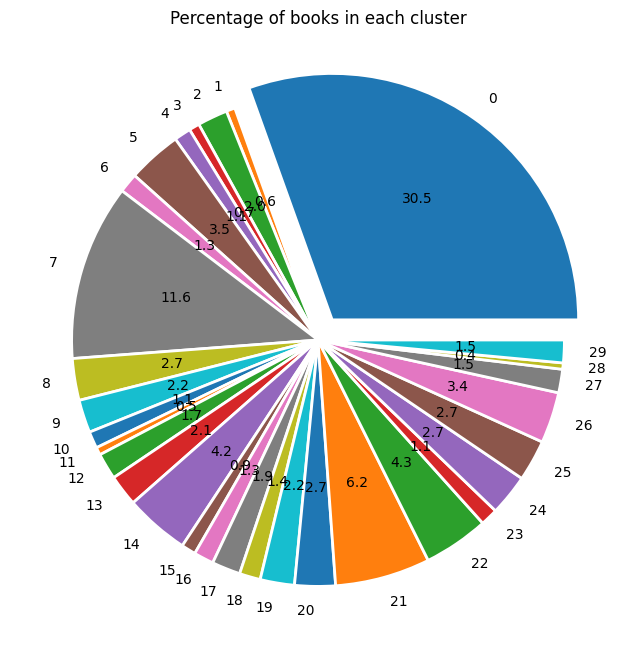

In [8]:
explode_max = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.figure(figsize=(12,8))
plt.pie(grouped_by_cluster['isbn'], labels=grouped_by_cluster['cluster_label'], autopct='%.1f', wedgeprops={'linewidth': 2, 'edgecolor': 'white'}, explode=explode_max)

plt.title('Percentage of books in each cluster')
plt.show()

In [9]:
books = pd.read_csv('../IR Project/BX-Books.csv')
books.head(5)

,isbn,book_title,book_author,year_of_publication,publisher,summary,category
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,Provides an introduction to classical myths pl...,['social science']
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",['actresses']
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,"Here, for the first time in paperback, is an o...",['1940-1949']
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,"Describes the great flu epidemic of 1918, an o...",['medical']
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,A look at the incredibly well-preserved ancien...,['design']


In [10]:
merged_dataset = pd.merge(books, clustered_books, on='isbn')
merged_dataset.drop(['summary_x'], inplace=True, axis=1)
merged_dataset.head(10)

,isbn,book_title,book_author,year_of_publication,publisher,category,summary_y,cluster_label
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,['social science'],Provides an introduction to classical myths pl...,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,['actresses'],"In a small town in Canada, Clara Callan reluct...",6
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,['1940-1949'],"Here, for the first time in paperback, is an o...",13
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,['medical'],"Describes the great flu epidemic of 1918, an o...",16
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,['design'],A look at the incredibly well-preserved ancien...,0
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,['fiction'],A Chinese immigrant who is convinced she is dy...,14
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,['history'],"Essays by respected military historians, inclu...",0
7,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,['fiction'],"An authoritative, revisionist history of the g...",0
8,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,['fiction'],"Now back in print, Ann Beattie&#39;s finest sh...",24
9,0771074670,Nights Below Station Street,David Adams Richards,1988,Emblem Editions,['fiction'],Another story based in the fictional rural tow...,6


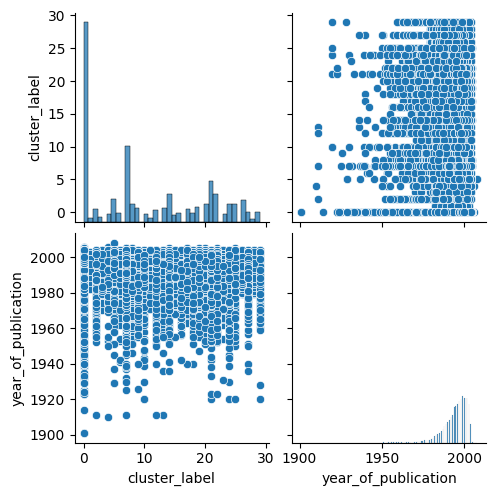

In [11]:
sns.pairplot(merged_dataset, vars=['cluster_label', 'year_of_publication'])
plt.show()

In [12]:
grouped_by_category = merged_dataset.groupby('category', as_index=False).count()
grouped_by_category.head(10)

count_categories = len(grouped_by_category)
count_categories

5946

We have 5946 categories which probably means that there in no connection between the categories and the clusters

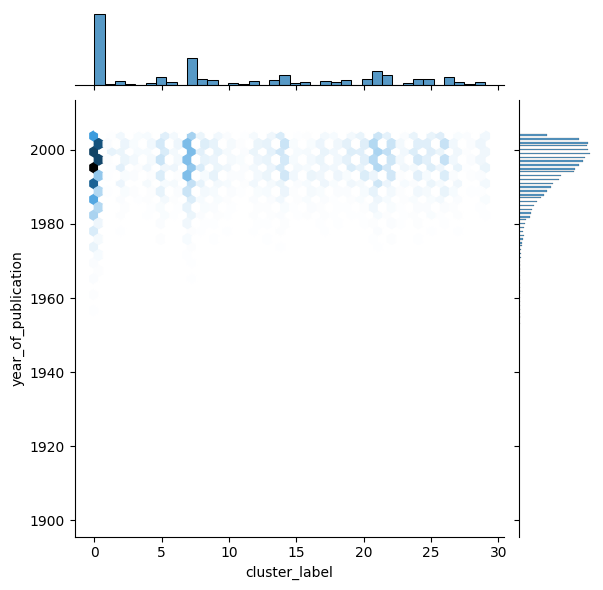

In [13]:

sns.jointplot(x='cluster_label', y='year_of_publication', 
              data=merged_dataset, kind='hex')

We see that there is no clear difference in this plot, so year_of_publication and clusters are not connected in any way

In [14]:
grouped_by_author = merged_dataset.groupby('book_author', as_index=False).count()
grouped_by_author.head(10)

count_authors = len(grouped_by_author)
count_authors

59382

We have 59382 authors which probably means that there in no connection between the authors and the cluster

In [15]:
grouped_by_publishers = merged_dataset.groupby('publisher', as_index=False).count()
grouped_by_publishers.head(10)

count_publishers = len(grouped_by_publishers)
count_publishers

7861

We have 7861 publishers, no connection